In [11]:
import pandas as pd
from nltk.tokenize import RegexpTokenizer
import nltk
regex=nltk.RegexpTokenizer(r'\w+')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [12]:
nltk.download("wordnet")
from nltk.corpus import wordnet #importing wordnet
nltk.download('stopwords')
from nltk.corpus import stopwords    #importing stopwords
stopwords=stopwords.words()   
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PARTHA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PARTHA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PARTHA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\PARTHA\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [13]:
train = pd.read_csv(r'D:\ureka\Tweet_Analysis\train.csv')
test = pd.read_csv(r'D:\ureka\Tweet_Analysis\test.csv')

In [14]:
train.shape,test.shape

((31962, 3), (17197, 2))

In [15]:
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

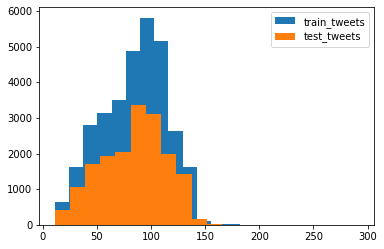

In [17]:
## check distribution of length of the tweets
import matplotlib.pyplot as plt
length_train = train['tweet'].str.len()
length_test = test['tweet'].str.len()

plt.hist(length_train, bins=20, label="train_tweets")
plt.hist(length_test, bins=20, label="test_tweets")
plt.legend()
plt.show()

In [18]:
#Text Pre Processing
train['word_count'] = train['tweet'].apply(lambda x: len(str(x).split(" "))) ## no of words
train[['tweet','word_count']].head()

,tweet,word_count
0,@user when a father is dysfunctional and is s...,21
1,@user @user thanks for #lyft credit i can't us...,22
2,bihday your majesty,5
3,#model i love u take with u all the time in ...,17
4,factsguide: society now #motivation,8


In [19]:
train['char_count'] = train['tweet'].str.len() ## no of characters
train[['tweet','char_count']].head()

,tweet,char_count
0,@user when a father is dysfunctional and is s...,102
1,@user @user thanks for #lyft credit i can't us...,122
2,bihday your majesty,21
3,#model i love u take with u all the time in ...,86
4,factsguide: society now #motivation,39


In [20]:
def avg_word(sentence):  
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))  ##avg word length

train['avg_word'] = train['tweet'].apply(lambda x: avg_word(x))
train[['tweet','avg_word']].head()

,tweet,avg_word
0,@user when a father is dysfunctional and is s...,4.555556
1,@user @user thanks for #lyft credit i can't us...,5.315789
2,bihday your majesty,5.666667
3,#model i love u take with u all the time in ...,4.928571
4,factsguide: society now #motivation,8.000000


In [21]:

from nltk.corpus import stopwords    
stop = stopwords.words('english')

train['stopwords'] = train['tweet'].apply(lambda x: len([x for x in x.split() if x in stop])) ##counting stopwords
train[['tweet','stopwords']].head()

,tweet,stopwords
0,@user when a father is dysfunctional and is s...,10
1,@user @user thanks for #lyft credit i can't us...,5
2,bihday your majesty,1
3,#model i love u take with u all the time in ...,5
4,factsguide: society now #motivation,1


In [22]:

train['hastags'] = train['tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('#')])) ##counting special characters
train[['tweet','hastags']].head()

,tweet,hastags
0,@user when a father is dysfunctional and is s...,1
1,@user @user thanks for #lyft credit i can't us...,3
2,bihday your majesty,0
3,#model i love u take with u all the time in ...,1
4,factsguide: society now #motivation,1


In [23]:
train['numerics'] = train['tweet'].apply(lambda x: len([x for x in x.split() if x.isdigit()])) ##counting numerics
train[['tweet','numerics']].head()

,tweet,numerics
0,@user when a father is dysfunctional and is s...,0
1,@user @user thanks for #lyft credit i can't us...,0
2,bihday your majesty,0
3,#model i love u take with u all the time in ...,0
4,factsguide: society now #motivation,0


In [24]:
## converting to lower case
train['tweet'] = train['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
train['tweet'].head()

0    @user when a father is dysfunctional and is so...
1    @user @user thanks for #lyft credit i can't us...
2                                  bihday your majesty
3    #model i love u take with u all the time in ur...
4                  factsguide: society now #motivation
Name: tweet, dtype: object

In [26]:
## removing punctuations
train['tweet'] = train['tweet'].str.replace('[^\w\s]','')
train['tweet'].head()

0    user when a father is dysfunctional and is so ...
1    user user thanks for lyft credit i cant use ca...
2                                  bihday your majesty
3    model i love u take with u all the time in urð...
4                    factsguide society now motivation
Name: tweet, dtype: object

In [27]:
from nltk.corpus import stopwords ##removing stopwords
stop = stopwords.words('english')
train['tweet'] = train['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
train['tweet'].head()

0    user father dysfunctional selfish drags kids d...
1    user user thanks lyft credit cant use cause do...
2                                       bihday majesty
3                model love u take u time urð ðððð ððð
4                        factsguide society motivation
Name: tweet, dtype: object

In [29]:
freq = pd.Series(' '.join(train['tweet']).split()).value_counts()[:10]  ##couting common word
freq

user     17473
love      2647
ð         2511
day       2199
â         1797
happy     1663
amp       1582
im        1139
u         1136
time      1110
dtype: int64

In [30]:
freq = list(freq.index)
train['tweet'] = train['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq)) ##common word removal
train['tweet'].head()

0    father dysfunctional selfish drags kids dysfun...
1    thanks lyft credit cant use cause dont offer w...
2                                       bihday majesty
3                              model take urð ðððð ððð
4                        factsguide society motivation
Name: tweet, dtype: object

In [31]:

freq = pd.Series(' '.join(train['tweet']).split()).value_counts()[-10:] ##finding rare words
freq

friendsforlife      1
notexcited          1
sacs                1
gerejamethodistâ    1
icantsleep          1
patiodesign         1
icebees             1
asfck               1
obvs                1
humankind           1
dtype: int64

In [32]:
freq = list(freq.index)
train['tweet'] = train['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))  ## rare words removal
train['tweet'].head()

0    father dysfunctional selfish drags kids dysfun...
1    thanks lyft credit cant use cause dont offer w...
2                                       bihday majesty
3                              model take urð ðððð ððð
4                        factsguide society motivation
Name: tweet, dtype: object

In [33]:
from textblob import TextBlob
train['tweet'][:5].apply(lambda x: str(TextBlob(x).correct())) ## spelling correction

0    father dysfunctional selfish drags kiss dysfun...
1    thanks left credit can use cause dont offer wh...
2                                       midday majesty
3                               model take or ðððð ððð
4                        factsguide society motivation
Name: tweet, dtype: object

In [34]:
TextBlob(train['tweet'][1]).words  ## Tokenization

WordList(['thanks', 'lyft', 'credit', 'cant', 'use', 'cause', 'dont', 'offer', 'wheelchair', 'vans', 'pdx', 'disapointed', 'getthanked'])

In [35]:
##Lemmatization
from textblob import Word
train['tweet'] = train['tweet'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))  
train['tweet'].head()

0    father dysfunctional selfish drag kid dysfunct...
1    thanks lyft credit cant use cause dont offer w...
2                                       bihday majesty
3                              model take urð ðððð ððð
4                        factsguide society motivation
Name: tweet, dtype: object

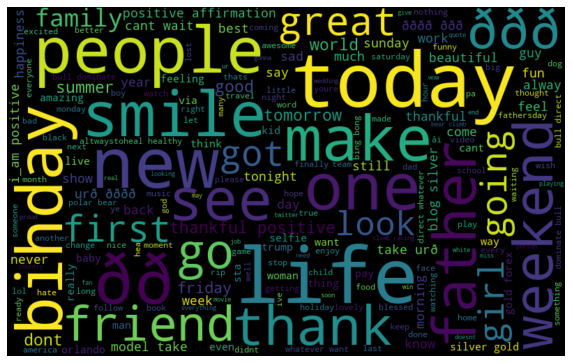

In [37]:
#Visualisation from Tweets
## understanding the more common words used in the tweet : wordcloud
## most frequent words in large size and less frequent words appear in small size
import matplotlib.pyplot as plt
all_words = ' '.join([text for text in train['tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()